# Basic EDA

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("C:/Users/HP LAPTOP/Downloads/house_price.csv")
data.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
data.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [12]:
data.value_counts()

location      size       total_sqft  bath  price   bhk  price_per_sqft
Haralur Road  2 BHK      1243.0      2.0   46.00   2    3700              18
TC Palaya     3 Bedroom  1200.0      2.0   66.00   3    5500              12
other         3 BHK      1464.0      3.0   56.00   3    3825              12
Chandapura    1 BHK      645.0       1.0   16.45   1    2550              11
HSR Layout    2 BHK      1140.0      2.0   46.00   2    4035               9
                                                                          ..
Jakkur        2 BHK      1100.0      2.0   52.00   2    4727               1
                                           53.35   2    4850               1
                         1125.0      2.0   44.75   2    3977               1
                                           65.00   2    5777               1
other         9 Bedroom  4500.0      9.0   166.00  9    3688               1
Name: count, Length: 12151, dtype: int64

In [13]:
data.isnull().sum() 

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

# No Null Values Detected

# Duplicate Check

In [15]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199     True
Length: 13200, dtype: bool

# 1049  Duplicates have found and removing it

In [5]:
datas=data.drop_duplicates()

In [24]:
datas.duplicated().sum()

0

# Detect And Removal Of Outliers
# Due to infinite calues they are scaled using log

C:\Users\HP LAPTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


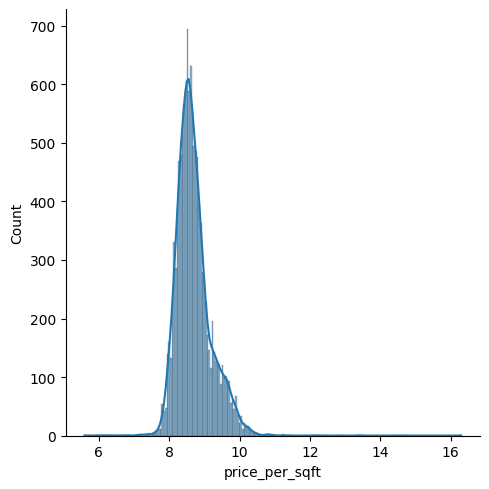

12151

In [6]:
df=pd.DataFrame(datas)
df['price_per_sqft'] = np.log1p(df['price_per_sqft'])
sns.displot(df['price_per_sqft'],kde='false')
plt.show()
df.head()
len(df)

# From the displot its clear that the graph is right skewed and have outliers. for the effective representation of the outliers we can use box plot

Text(0.5, 0, 'Price per Sqft')

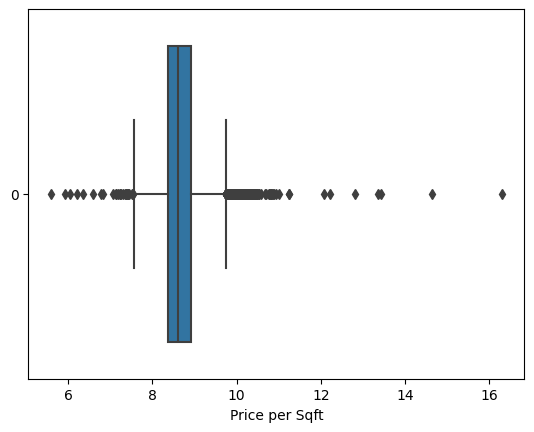

In [52]:
sns.boxplot(df['price_per_sqft'],orient='h')
plt.xlabel('Price per Sqft')

# Mean And Standard Deviation

In [7]:
df['price_per_sqft'] = df['price_per_sqft'].astype(float)

# Calculate the mean of the column
m = df['price_per_sqft'].mean()
m



8.693733779647003

In [10]:
s=df.price_per_sqft.std()
s

0.4946353467551614

In [15]:
lower=m-3*s
lower

7.209827739381518

In [13]:
upper=m+3*s
upper

10.177639819912487

In [32]:
#Outliers
df1=df[(df.price_per_sqft<7.2) | (df.price_per_sqft>10.17)]


Text(0.5, 0, 'price_per_sqft')

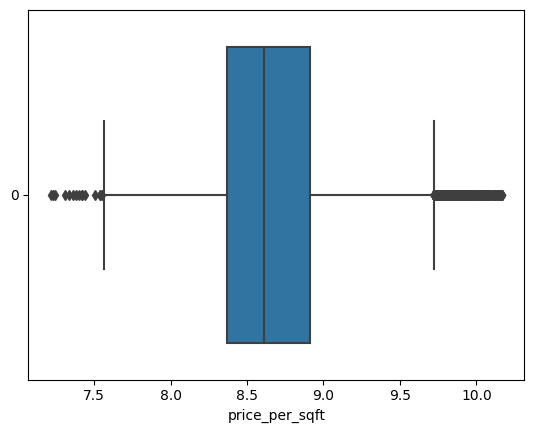

In [6]:
#With out outliers-trimming
MNSD=df[(df.price_per_sqft>7.2) & (df.price_per_sqft<10.17)]
len(MNSD)
sns.boxplot(MNSD['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')

12151

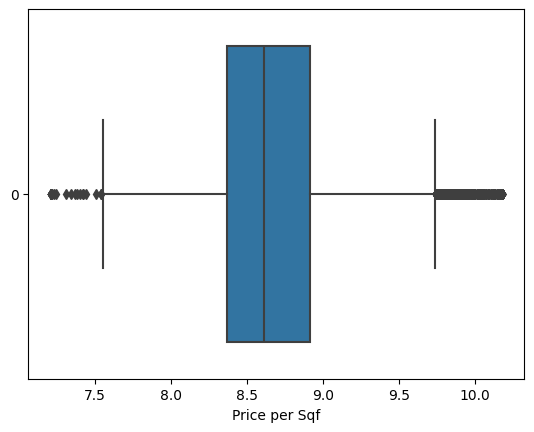

In [16]:
#Capping
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqf")
len(newdf)


<Axes: >

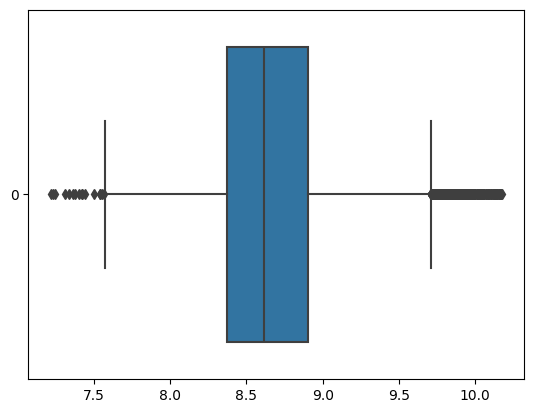

In [16]:
#imputation
new=df.copy()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=m
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=m
sns.boxplot(new['price_per_sqft'],orient='h')


# Z-SCORE

In [19]:
upper_limit= df['price_per_sqft'].mean() + 3*df['price_per_sqft'].std()
lower_limit= df['price_per_sqft'].mean() - 3*df['price_per_sqft'].std()
print(upper_limit,lower_limit)

10.177639819912487 7.209827739381518


In [24]:
#outliers
df.loc[(df['price_per_sqft']<7.2) | (df['price_per_sqft']>10.12)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,10.498884
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,10.414333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,10.206698
345,other,3 Bedroom,11.0,3.0,74.0,3,13.419096
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,5.918894
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,10.826754
13013,other,4 Bedroom,1200.0,5.0,350.0,4,10.280793
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,10.249238
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,10.463132


In [27]:
#Z score outlier trimming
dfree=df.loc[(df['price_per_sqft']>7.2) & (df['price_per_sqft']<10.12)]
dfree
print("before trim",len(df))
print("after",len(dfree))

before trim 12151
after 12025


12151

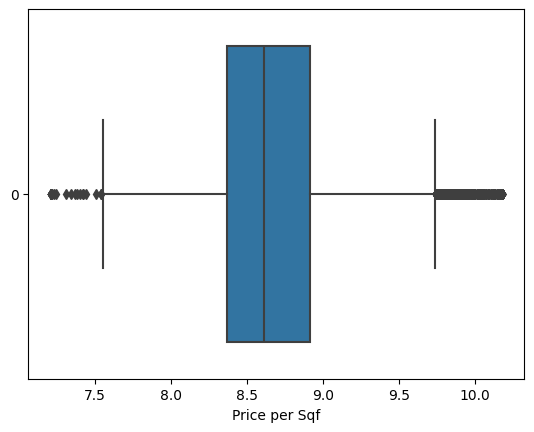

In [28]:
#Capping in Z-Score
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqf")
len(newdf)


12151

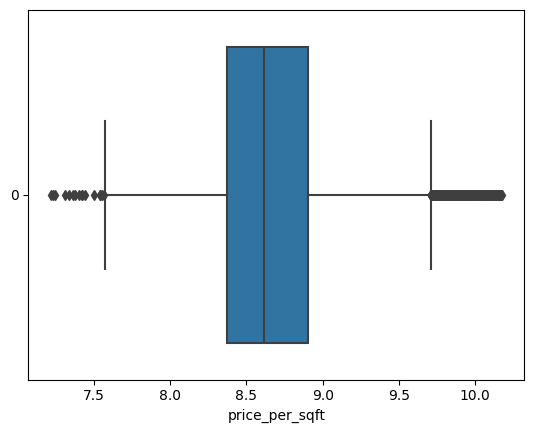

In [32]:
#imputation in z-score
new=df.copy()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=m
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=m
sns.boxplot(new['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(new['price_per_sqft'])

# IQR

In [35]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr= q3-q1
q1,q3,iqr

(8.369388996647842, 8.91757874480145, 0.5481897481536073)

In [41]:
lower= q1-(1.5 * iqr)
upper= q3+(1.5 * iqr)
upper,lower

(9.73986336703186, 7.547104374417431)

In [44]:
#IQR Trimming
dfree=df.loc[(df['price_per_sqft']>lower) & (df['price_per_sqft']<upper)]
dfree
print("before trim",len(df))
print("after",len(dfree))
dfree

before trim 12151
after 11683


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,8.216088
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,8.437284
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,8.367765
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,8.739697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,8.354910
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,8.784315
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,8.808369
13196,other,4 BHK,3600.0,5.0,400.00,4,9.315781
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,8.567696


12151

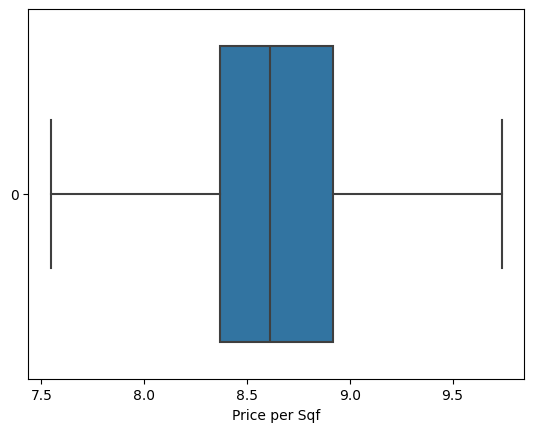

In [45]:
#Capping in IQR
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqf")
len(newdf)


12151

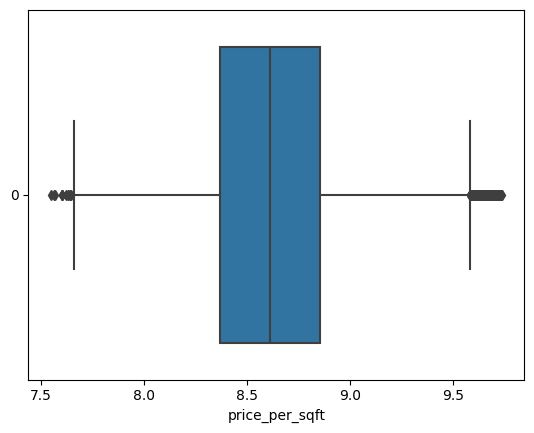

In [48]:
#imputation in iqr
new=df.copy()
median=new['price_per_sqft'].median()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=median
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=median
sns.boxplot(new['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(new['price_per_sqft'])

## PERCENTILE METHOD

In [66]:
upper=df['price_per_sqft'].quantile(0.95)
lower=df['price_per_sqft'].quantile(0.05)
upper,lower


(9.65509029374725, 8.055475141757274)

In [56]:
#percentile method outliers
out=df.loc[(df['price_per_sqft']<lower) | (df['price_per_sqft']>upper)]
out



,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,9.808187
9,other,6 Bedroom,1020.0,6.0,370.00,6,10.498884
20,Kengeri,1 BHK,600.0,1.0,15.00,1,7.824446
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,8.016648
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,10.414333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,8.006701
13141,other,3 Bedroom,2000.0,2.0,360.00,3,9.798183
13142,other,2 BHK,1140.0,1.0,185.00,2,9.694555
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,7.942007


In [57]:
#percentile Trimming
dfree=df.loc[(df['price_per_sqft']>lower) & (df['price_per_sqft']<upper)]
dfree
print("before trim",len(df))
print("after",len(dfree))
dfree

before trim 12151
after 10928


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,8.216088
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,8.437284
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,8.367765
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,8.739697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,8.354910
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,8.784315
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,8.808369
13196,other,4 BHK,3600.0,5.0,400.00,4,9.315781
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,8.567696


10928

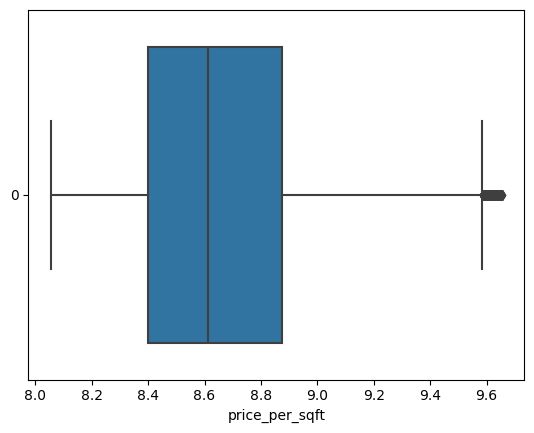

In [65]:
sns.boxplot(dfree['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(dfree['price_per_sqft'])

12151

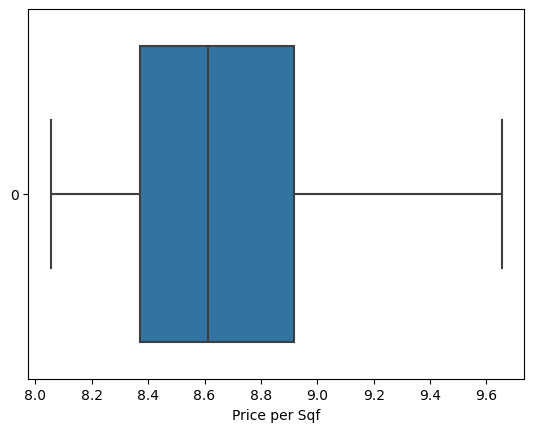

In [67]:
#Capping in PERCENTILE
newdf=df.copy()
newdf.loc[newdf['price_per_sqft']>upper, 'price_per_sqft']=upper
newdf.loc[newdf['price_per_sqft']<lower, 'price_per_sqft']=lower
sns.boxplot(newdf['price_per_sqft'],orient='h')
plt.xlabel("Price per Sqf")
len(newdf)

12151

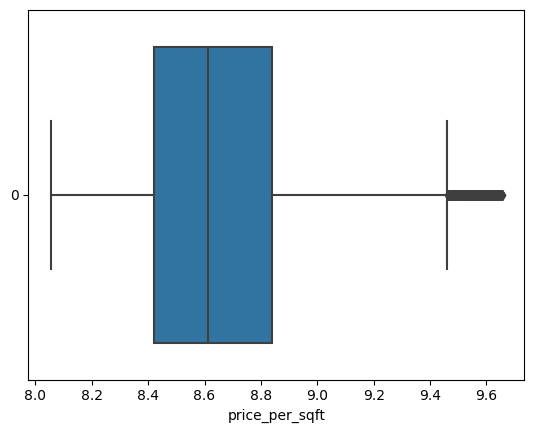

In [68]:
#imputation in PERCENTILE
new=df.copy()
median=new['price_per_sqft'].median()

new.loc[new['price_per_sqft']>upper, 'price_per_sqft']=median
new.loc[new['price_per_sqft']<lower, 'price_per_sqft']=median
sns.boxplot(new['price_per_sqft'],orient='h')
plt.xlabel('price_per_sqft')
len(new['price_per_sqft'])

C:\Users\HP LAPTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

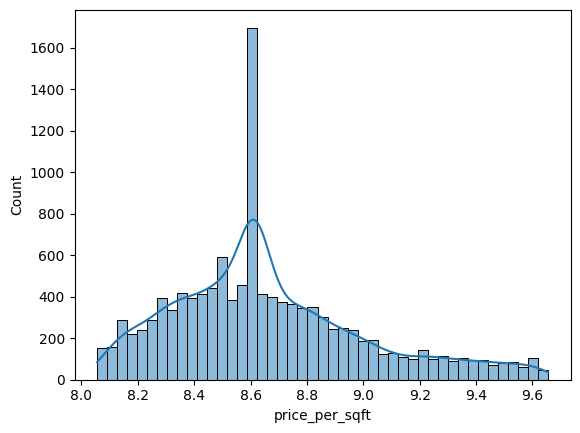

In [71]:
sns.histplot(new['price_per_sqft'],kde='True')

C:\Users\HP LAPTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

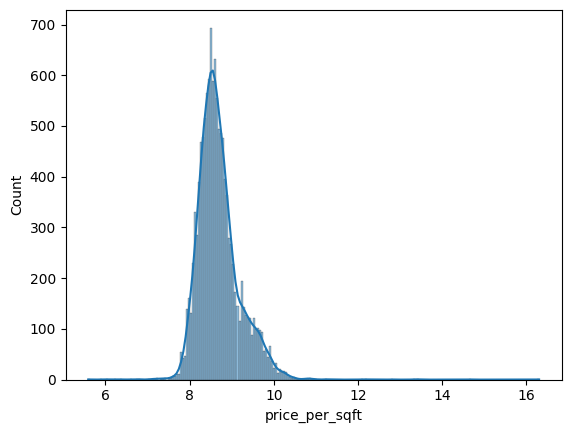

In [73]:
# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.
sns.histplot(df['price_per_sqft'],kde='True')

In [74]:
skewness_before = df['price_per_sqft'].skew()
kurtosis_before = df['price_per_sqft'].kurtosis()

print(f"Skewness before transformation: {skewness_before}")
print(f"Kurtosis before transformation: {kurtosis_before}")

Skewness before transformation: 1.401043314411164
Kurtosis before transformation: 9.408799464773509


# LOG TRANSFORMATION

In [76]:
df['price_per_sqft']=np.log(df['price_per_sqft'])
df['price_per_sqft']

0        0.744835
1        0.757370
2        0.753483
3        0.773748
4        0.752759
           ...   
13194    0.776094
13195    0.777352
13196    0.802768
13197    0.764537
13198    0.799604
Name: price_per_sqft, Length: 12151, dtype: float64

C:\Users\HP LAPTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Count'>

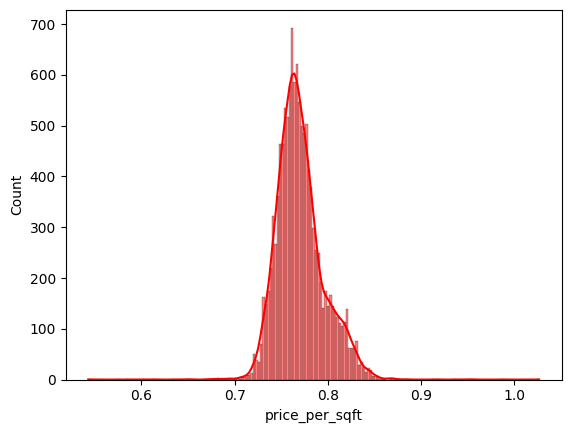

In [80]:
sns.histplot(df['price_per_sqft'],kde='false',color='r')

In [86]:
df['price_per_sqft'].skew()

0.6346219343183234

In [85]:
from scipy.stats import skew, kurtosis
kurtosis(df['price_per_sqft'],fisher=False)

6.739312315897683

# Check the correlation between all the numerical columns and plot heatmap.

In [90]:
df1=df.drop(["location","size"],axis=1)
coor=df1.corr()
coor

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,0.078113
bath,0.386694,1.000000,0.448802,0.898875,0.420387
price,0.572516,0.448802,1.000000,0.390008,0.569492
bhk,0.339936,0.898875,0.390008,1.000000,0.399239
price_per_sqft,0.078113,0.420387,0.569492,0.399239,1.000000


<Axes: >

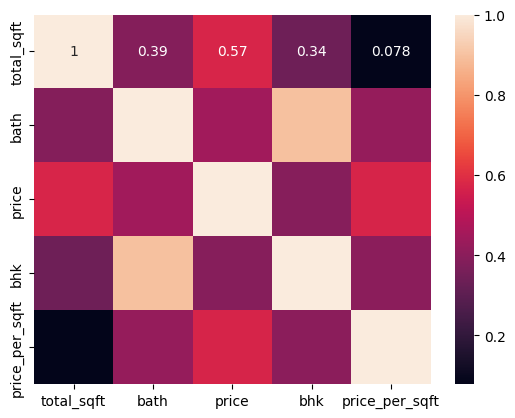

In [91]:
sns.heatmap(coor,annot=True)